Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the pregnancy file.

In [1]:
%matplotlib inline

import nsfg
preg = nsfg.ReadFemPreg()

nsfg.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.birthwgt_lb[df.birthwgt_lb > 20] = np.nan


Select live births, then make a CDF of <tt>totalwgt_lb</tt>. 

In [15]:
import thinkstats2 as ts
import thinkplot as tp

In [6]:
# for calculations across all observations, use the preg dataframe
cdf = ts.Cdf(preg["totalwgt_lb"], label="totalwgt_lb")

Display the CDF.

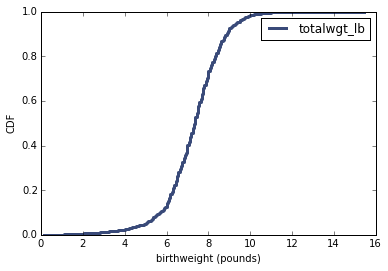

In [10]:
tp.Cdf(cdf)
tp.Show(xlabel='birthweight (pounds)', ylabel='CDF')

Find out how much you weighed at birth, if you can, and compute CDF(x). 

In [14]:
# pretty sure it was about 7 lbs
cdf.Prob(7)

0.40185881832263776

If you are a first child, look up your birthweight in the CDF of first children; otherwise use the CDF of other children.

In [19]:
# useful for the first v. other comparisons
import first
live, firsts, others = first.MakeFrames()

In [20]:
ts.Cdf(firsts["totalwgt_lb"], label="totalwgt_lb-firsts").Prob(7)

0.4180609672243869

Compute the percentile rank of your birthweight

In [22]:
cdf.PercentileRank(7)

40.185881832263775

Compute the median birth weight by looking up the value associated with p=0.5.

In [23]:
cdf.Value(0.5)

7.375

Compute the interquartile range (IQR) by computing percentiles corresponding to 25 and 75. 

In [25]:
cdf.Value(0.25), cdf.Value(0.75)

(6.5, 8.125)

Make a random selection from <tt>cdf</tt>.

In [29]:
import random

In [41]:
cdf.Value(random.random())

8.0625

Draw a random sample from <tt>cdf</tt>.

In [42]:
[ cdf.Value(random.random()) for _ in range(10) ]

[9.0625, 7.4375, 7.1875, 6.375, 8.3125, 7.8125, 8.625, 7.25, 7.9375, 6.25]

Draw a random sample from <tt>cdf</tt>, then compute the percentile rank for each value, and plot the distribution of the percentile ranks.

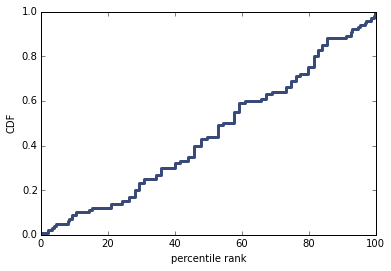

In [52]:
size = 100
sample = [ cdf.Value(random.random()) for _ in range(size) ]

ranks = [ cdf.PercentileRank(x) for x in sample ]

tp.Cdf( ts.Cdf(ranks) )
tp.show(xlabel='percentile rank', ylabel='CDF')

Generate 1000 random values using <tt>random.random()</tt> and plot their PMF.

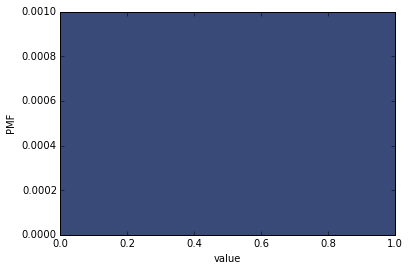

In [55]:
pmf = ts.Pmf([ random.random() for _ in range(1000) ])

tp.Pmf(pmf)
tp.show(xlabel='value', ylabel='PMF')

Assuming that the PMF doesn't work very well, try plotting the CDF instead.

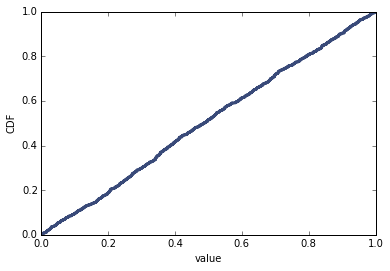

In [56]:
cdf = ts.Cdf([ random.random() for _ in range(1000) ])

tp.Cdf(cdf)
tp.show(xlabel='value', ylabel='CDF')